<a href="https://colab.research.google.com/github/Sivah1234/Machine-Learning/blob/master/Logistic_Regression_Survival_prediction_on_Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/tested.csv")

In [ ]:
df=pd.read_csv("/content/tested.csv")

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
df["Survived"]

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [ ]:
df["Survived"].value_counts()

,count
Survived,
0,266
1,152


In [ ]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
female,0,152
male,266,0


In [ ]:
women=df[df["Sex"]=="female"]
women

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


In [ ]:
women_survied=women[women["Survived"]==1]
women_not_survied=women[women["Survived"]==0]

In [ ]:
male=df[df["Sex"]=="male"]


In [ ]:

male_not_survived=male[male["Survived"]==0]
male_survived=male[male["Survived"]==1]

In [ ]:
male_not_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


/tmp/ipython-input-102-3466381456.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(women_not_survied.Age,bins=5,label="women_not_survived",kde=False)
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipython-input-102-3466381456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-le

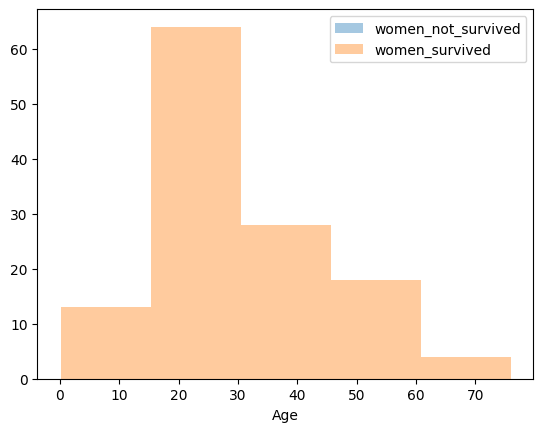

In [ ]:
sns.distplot(women_not_survied.Age,bins=5,label="women_not_survived",kde=False)
sns.distplot(women_survied.Age,bins=5,label="women_survived",kde=False)

plt.legend()


/tmp/ipython-input-103-180946795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_not_survived.Age,bins=5,label="male_not_survived",kde=False)
/tmp/ipython-input-103-180946795.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_survived.Age,bins=5,label="male_survived",kde=False)


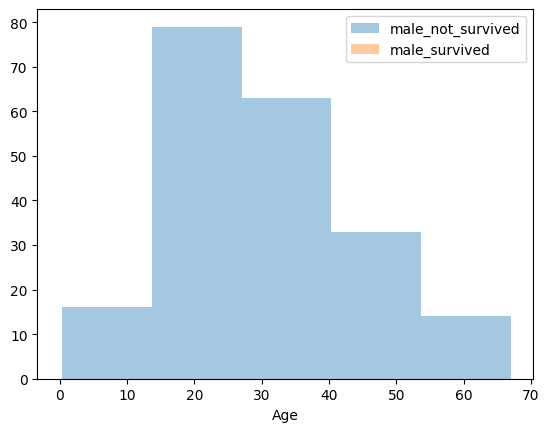

In [ ]:
sns.distplot(male_not_survived.Age,bins=5,label="male_not_survived",kde=False)
sns.distplot(male_survived.Age,bins=5,label="male_survived",kde=False)
plt.legend()


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


<Axes: >

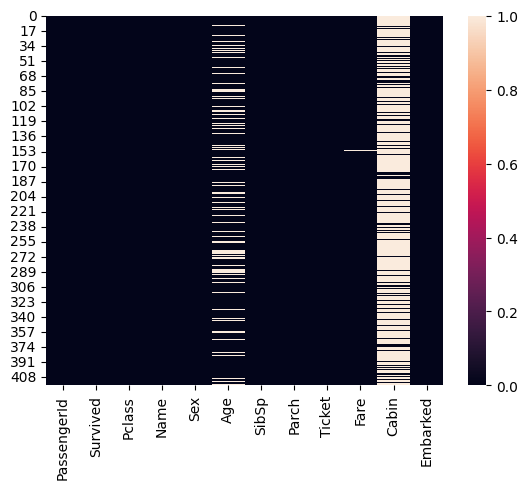

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.shape

(418, 12)

In [ ]:
df.drop(["Cabin"],axis=1,inplace=True)

In [ ]:
df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
df["Embarked"].value_counts()

,count
Embarked,
S,270
C,102
Q,46


In [ ]:
df["Embarked"]=df["Embarked"].fillna("")

In [ ]:
df["Age"].mean()
df["Age"].median()
df["Age"].mode()

,Age
0,21.0
1,24.0


In [ ]:
Age_tmp=np.array([1,2,3,np.nan,np.nan,6,7,8,np.nan,10])
Age_tmp

array([ 1.,  2.,  3., nan, nan,  6.,  7.,  8., nan, 10.])

In [ ]:
random_age_tmp=np.random.randint(1,100,3)
random_age_tmp

array([35, 88, 50])

In [ ]:
np.isnan(Age_tmp)

array([False, False, False,  True,  True, False, False, False,  True,
       False])

In [ ]:
Age_tmp[np.isnan(Age_tmp)]=random_age_tmp
Age_tmp

array([ 1.,  2.,  3., 35., 88.,  6.,  7.,  8., 50., 10.])

In [ ]:
#handling missing value on age columns

In [ ]:
mean_Age=df["Age"].mean()
mean_Age

np.float64(30.272590361445783)

In [ ]:
std_Age=df["Age"].std()
std_Age

14.18120923562442

In [ ]:
low_Age=mean_Age-std_Age
low_Age

np.float64(16.091381125821364)

In [ ]:
hige_Age=mean_Age+std_Age
hige_Age

np.float64(44.4537995970702)

In [ ]:
random_Ages=np.random.randint(15,44,86)
random_Ages

array([32, 22, 40, 29, 15, 38, 23, 33, 32, 27, 41, 42, 30, 20, 20, 27, 39,
       21, 39, 24, 18, 42, 40, 25, 32, 27, 16, 28, 27, 41, 21, 30, 25, 35,
       24, 20, 19, 27, 22, 36, 34, 16, 24, 38, 35, 39, 38, 35, 15, 20, 40,
       16, 24, 24, 19, 43, 37, 33, 28, 38, 38, 16, 37, 26, 34, 37, 29, 38,
       36, 43, 27, 35, 34, 21, 28, 39, 32, 32, 41, 20, 43, 38, 21, 43, 24,
       28])

In [ ]:
age_copy=df["Age"].copy()
age_copy

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
413,NaN
414,39.0
415,38.5
416,NaN


In [ ]:
age_copy[np.isnan(age_copy)]=random_Ages
age_copy


,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
413,43.0
414,39.0
415,38.5
416,24.0


In [ ]:
df["Age"]=age_copy

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
#variable information

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,43.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S


In [ ]:
df["Sex"].value_counts()

,count
Sex,
male,265
female,152


In [ ]:
df["Sex"]=df["Sex"].map({"male":"0","female":"1"})

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,43.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",0,24.0,0,0,359309,8.0500,S


In [ ]:
df["Embarked"].value_counts()

,count
Embarked,
S,269
C,102
Q,46


In [ ]:
boarding_point=pd.get_dummies(df["Embarked"],drop_first=True).astype(int)
boarding_point

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [ ]:
df.drop(["Name","Ticket","PassengerId","Embarked"],axis=1,inplace=True)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,34.5,0,0,7.8292
1,1,3,1,47.0,1,0,7.0000
2,0,2,0,62.0,0,0,9.6875
3,0,3,0,27.0,0,0,8.6625
4,1,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,0,43.0,0,0,8.0500
414,1,1,1,39.0,0,0,108.9000
415,0,3,0,38.5,0,0,7.2500
416,0,3,0,24.0,0,0,8.0500


In [ ]:
df=pd.concat([df,boarding_point],axis=1)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,34.5,0,0,7.8292,1,0
1,1,3,1,47.0,1,0,7.0000,0,1
2,0,2,0,62.0,0,0,9.6875,1,0
3,0,3,0,27.0,0,0,8.6625,0,1
4,1,3,1,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,0,43.0,0,0,8.0500,0,1
414,1,1,1,39.0,0,0,108.9000,0,0
415,0,3,0,38.5,0,0,7.2500,0,1
416,0,3,0,24.0,0,0,8.0500,0,1


Model Building

In [ ]:
X=df.drop("Survived",axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,0,34.5,0,0,7.8292,1,0
1,3,1,47.0,1,0,7.0000,0,1
2,2,0,62.0,0,0,9.6875,1,0
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,0,43.0,0,0,8.0500,0,1
414,1,1,39.0,0,0,108.9000,0,0
415,3,0,38.5,0,0,7.2500,0,1
416,3,0,24.0,0,0,8.0500,0,1


In [ ]:
Y=df["Survived"]
Y

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [ ]:
model=LogisticRegression(max_iter=500)

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=500)

In [ ]:
predicted_res=model.predict(X_test)
predicted_res

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

In [ ]:
Y_test

,Survived
153,1
398,0
412,1
94,0
70,1
...,...
308,0
256,0
148,0
174,0


In [ ]:
accuracy_score(Y_test,predicted_res)

1.0

In [ ]:
confusion_matrix(Y_test,predicted_res)

array([[90,  0],
       [ 0, 48]])

In [ ]:
print(classification_report(Y_test,predicted_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        48

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [ ]:
Y_test.value_counts()

,count
Survived,
0,90
1,48


In [ ]:
print("0",(predicted_res==0).sum())
print("1",(predicted_res==1).sum())

0 90
1 48


In [ ]:
print("macro avg")
(1.00+1.00)/2

macro avg


1.0

In [ ]:
((90*1.00)+(48*1.00))/(240+153)

0.3511450381679389

predicition for jack

In [ ]:
X_test.iloc[0]

,153
Pclass,3
Sex,1
Age,36.0
SibSp,0
Parch,2
Fare,12.1833
Q,0
S,1


In [ ]:
df.groupby("Pclass")["Fare"].max()

,Fare
Pclass,
1,512.3292
2,73.5000
3,69.5500


In [ ]:
jack=[[2,0,22,0,0,73.5000,0,1]]
model.predict(jack)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

predicition for rose

In [ ]:
rose=[[1,1,22,0,1,512.3292,0,1]]
model.predict(rose)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])